<a href="https://colab.research.google.com/github/sohels984/sohels984/blob/main/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [ ]:
df=pd.read_csv("/kaggle/input/videogamesales/vgsales.csv",index_col="Rank")

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16598, 10)

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.isna().any()

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [ ]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df["Year"]=df["Year"].astype(int) # converting years value from float to int.

In [ ]:
df1=df[df["Year"]==0]
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,0,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
# adding exta column for single value(for calculating groupby)
df["Ext"]="sss"
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,sss
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,sss
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,sss
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,sss
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,sss
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,sss
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,sss


In [ ]:
# calculating the year counts.
a=df.groupby("Year")['Ext'].count()
a.sort_values(ascending=False)

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Ext, dtype: int64

In [ ]:
df["Year"].mode()

0    2009
Name: Year, dtype: int64

# Here we have to mode the 0 value of year column to this column. There are many reasons for this.
# 1) We tried to match the year and genre columns, but no correlation was found between the two.
# 2) Mean of this column cannot be used in any way because in this way we do not get any kind of satisfactory answer.


In [ ]:
df["Year"].replace(0,2009,inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,sss
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,sss
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,sss
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,sss
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,sss
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,sss
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,sss


In [ ]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Ext             0
dtype: int64

In [ ]:
# Getting the data where publisher column is null.
df2=df[df["Publisher"]==0]
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,2009,Fighting,0,1.57,1.02,0.00,0.41,3.00,sss
1305,Triple Play 99,PS,2009,Sports,0,0.81,0.55,0.00,0.10,1.46,sss
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,0,0.87,0.32,0.00,0.02,1.21,sss
2224,Bentley's Hackpack,GBA,2005,Misc,0,0.67,0.25,0.00,0.02,0.93,sss
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,0,0.46,0.17,0.00,0.01,0.64,sss
3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,0,0.46,0.17,0.00,0.01,0.64,sss
3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,0,0.38,0.14,0.00,0.01,0.53,sss
4147,Sonic the Hedgehog,PS3,2009,Platform,0,0.00,0.48,0.00,0.00,0.48,sss
4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,0,0.31,0.11,0.00,0.01,0.43,sss


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Ext'],
      dtype='object')

In [ ]:
df2.groupby("Genre")['Publisher'].count()

Genre
Action           7
Adventure        4
Fighting         2
Misc            27
Platform         2
Puzzle           1
Racing           1
Role-Playing     2
Shooter          2
Simulation       4
Sports           3
Strategy         3
Name: Publisher, dtype: int64

In [ ]:
df["Publisher"].replace(0,'Unknown',inplace=True)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,sss
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,sss
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,sss
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,sss
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,sss
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,sss
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,sss


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<Axes: xlabel='Rank'>

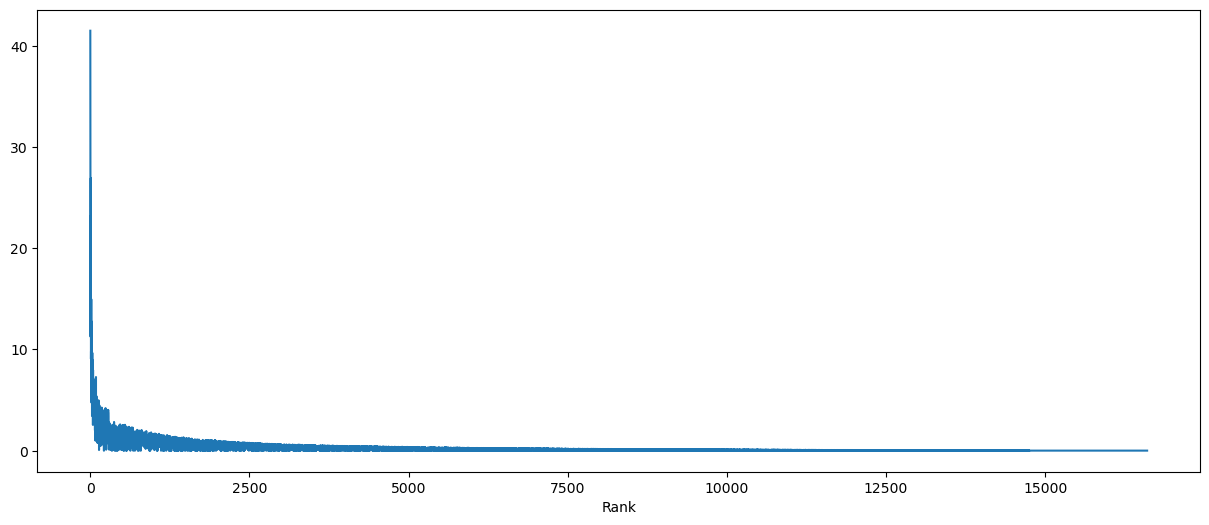

In [ ]:
df["NA_Sales"].plot(figsize=(15,6))

In [ ]:
df["NA_Sales"].nlargest(5) # Getting 5 largest values.

Rank
1     41.49
2     29.08
10    26.93
6     23.20
3     15.85
Name: NA_Sales, dtype: float64

In [ ]:
larger_na_Sales=df[df["NA_Sales"] > 29.08]
larger_na_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss


# There is a value 41.49 in NA_sales which seems like an outlier as it is 43% larger than the second largest value, but on this basis alone we cannot declare it an outlier. This may be a correct value. And due to its removal or any other way of working on it, there is an unexpected decrease in the values in the dataset. Apart from this, we have no solid reason to consider this value as an outlier. So I have decided to use this value as it is in the dataframe.

<Axes: xlabel='Rank'>

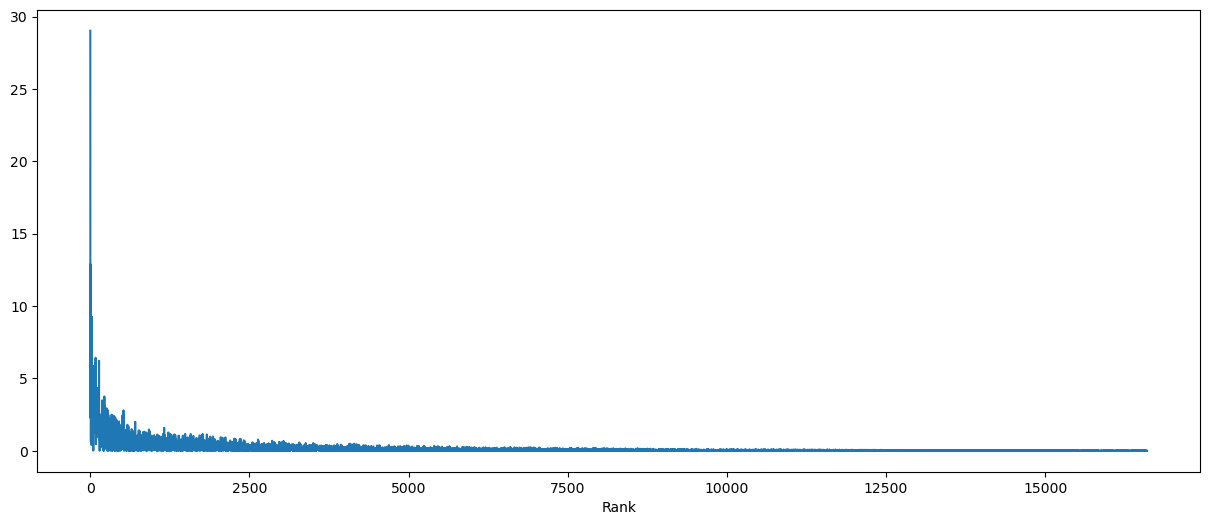

In [ ]:
df["EU_Sales"].plot(figsize=(15,6))

In [ ]:
df["EU_Sales"].nlargest(5)

Rank
1     29.02
3     12.88
4     11.01
11    11.00
17     9.27
Name: EU_Sales, dtype: float64

In [ ]:
larger_eu_Sales=df[df["EU_Sales"] > 12.88]
larger_eu_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss


# As in the above outlier calculation, this EU_sales also has the same game and the same publisher and the value is 125% greater than the second largest value, but only on this basis it is not correct to be considered an outlier. It is possible that this game has really been the biggest sales game of that time, which has earned the most in both the countries. So we will take it as it is.

<Axes: xlabel='Rank'>

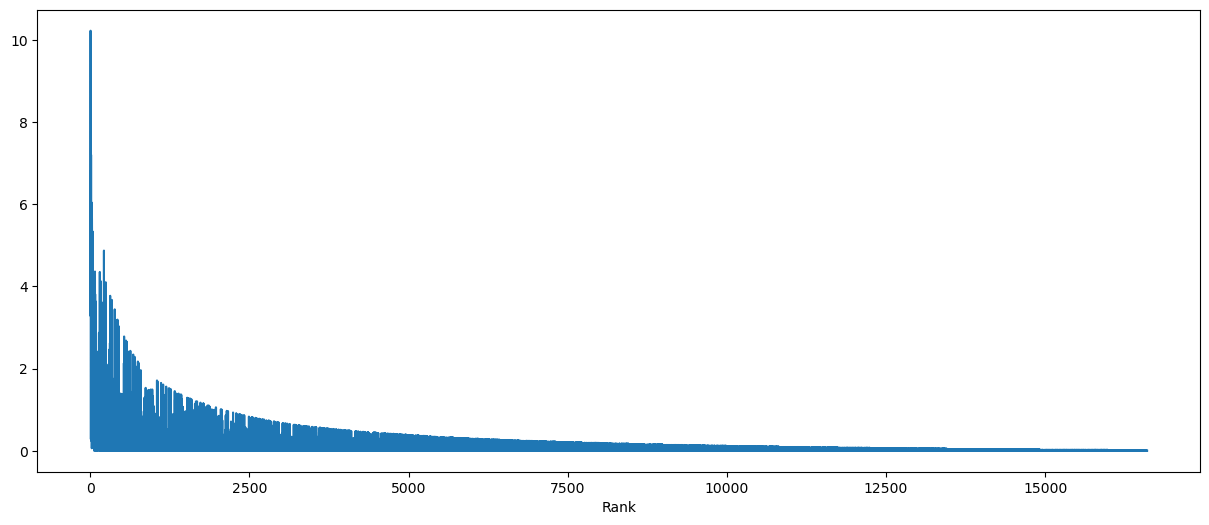

In [ ]:
df["JP_Sales"].plot(figsize=(15,6))

In [ ]:
df["JP_Sales"].nlargest(5)

Rank
5     10.22
13     7.20
2      6.81
7      6.50
21     6.04
Name: JP_Sales, dtype: float64

# No Outlier found.

In [ ]:
larger_jp_Sales=df[df["JP_Sales"] > 7.2]
larger_jp_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,sss


<Axes: xlabel='Rank'>

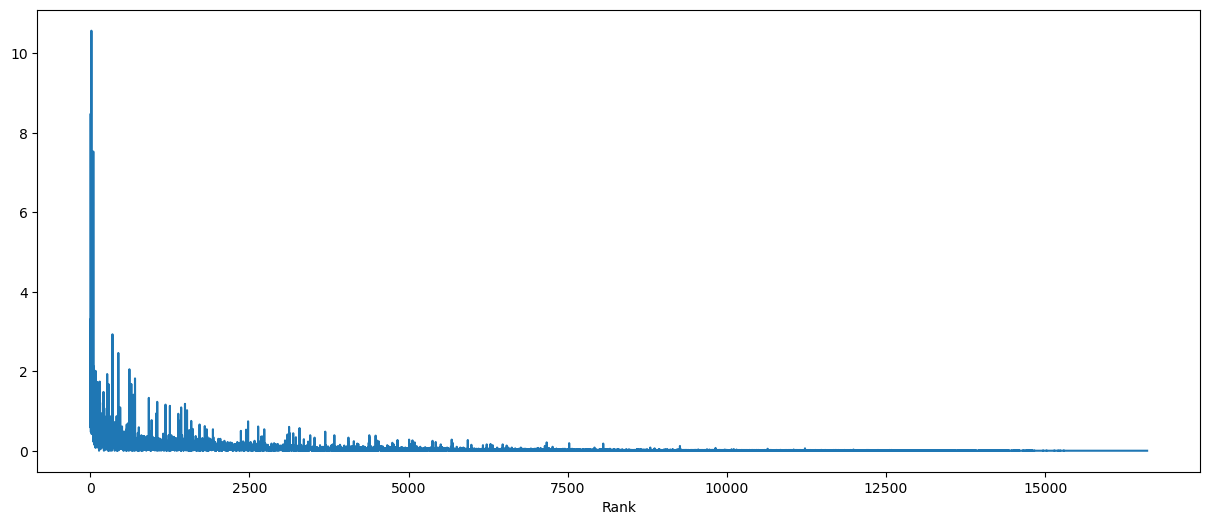

In [ ]:
df["Other_Sales"].plot(figsize=(15,6))

In [ ]:
df["Other_Sales"].nlargest(5)

Rank
18    10.57
1      8.46
48     7.53
17     4.14
3      3.31
Name: Other_Sales, dtype: float64

# No Outlier found.

In [ ]:
larger_ot_Sales=df[df["Other_Sales"] > 8.46]
larger_ot_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81,sss


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Ext'],
      dtype='object')

In [ ]:
df[df.duplicated(keep=False)] # Generationg dataframe of duplicate values.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
15000,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02,sss
15002,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02,sss


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,sss
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,sss
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,sss
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,sss
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,sss
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,sss
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,sss


In [ ]:
# Removing duplicates.
df.drop_duplicates(inplace=True, ignore_index=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ext
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,sss
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,sss
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,sss
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,sss
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,sss
...,...,...,...,...,...,...,...,...,...,...,...
16592,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,sss
16593,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,sss
16594,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,sss
16595,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,sss


# How many unique values are there in the 'Genre' and 'Platform' columns?

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Ext'],
      dtype='object')

In [ ]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# What are the top genres and platforms in terms of sales?

In [ ]:
genre_sales=df.groupby("Genre")['Global_Sales'].sum()
genre_sales.sort_values(ascending=False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.35
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

<Axes: ylabel='Global_Sales'>

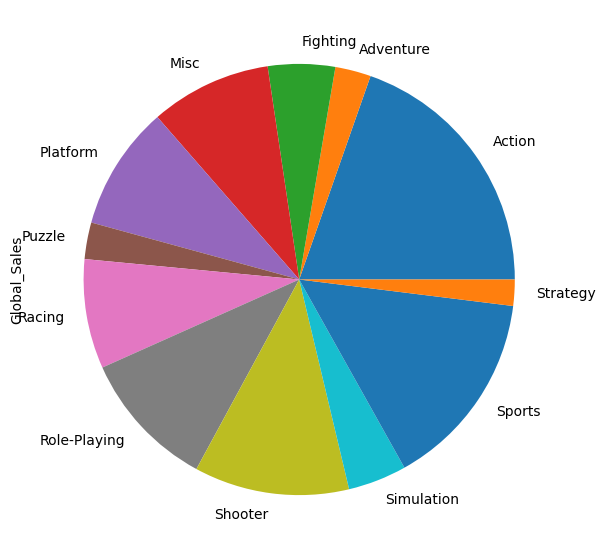

In [ ]:
genre_sales.plot(kind='pie',figsize=(10,7))

In [ ]:
platform_sales=df.groupby("Platform")['Global_Sales'].sum()
platform_sales.sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.69
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

<Axes: xlabel='Platform'>

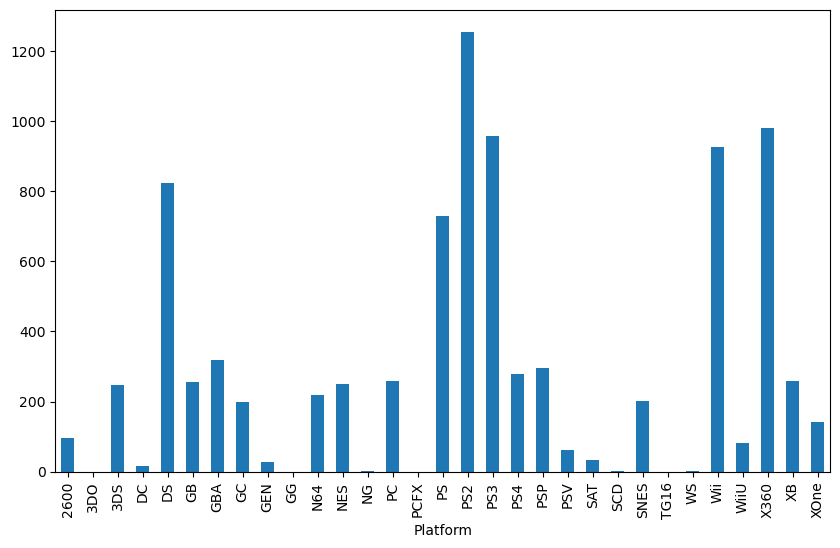

In [ ]:
platform_sales.plot(kind='bar',figsize=(10,6))

# Are there any relationships between 'Genre' and 'Global_Sales'?

In [ ]:
df.groupby("Genre")['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.35
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

# When we explored the relationship between Genre and global_sale, we found out that action, sports and shooter games are the most popular among people. These three games account for 46% of the total revenue, which is a huge number. Therefore, if we focus on these three types of games then we can take them to the next level.

# What is the distribution of sales across regions (NA, EU, JP, Other)?

In [ ]:
all_sales=df.groupby("Ext")['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
all_sales

/tmp/ipykernel_32/182554369.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_sales=df.groupby("Ext")['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Ext,,,,
sss,4392.95,2434.13,1291.0,797.75


<Axes: xlabel='Ext'>

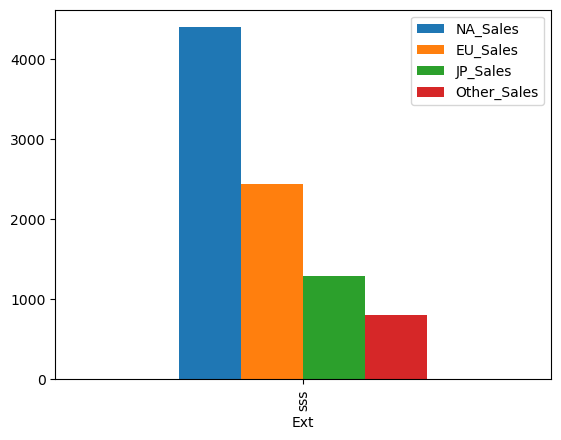

In [ ]:
all_sales.plot(kind='bar')

# Are there any trends in sales over the years?

In [ ]:
sales=df.groupby("Year")['Global_Sales'].sum()
sales

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    419.31
2005    459.94
2006    521.04
2007    611.13
2008    678.90
2009    767.36
2010    600.45
2011    515.99
2012    363.54
2013    368.11
2014    337.05
2015    264.44
2016     70.93
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

<Axes: xlabel='Year'>

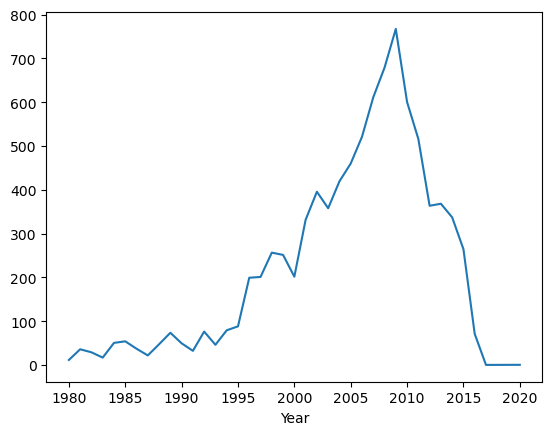

In [ ]:
sales.plot()

<Axes: xlabel='Year'>

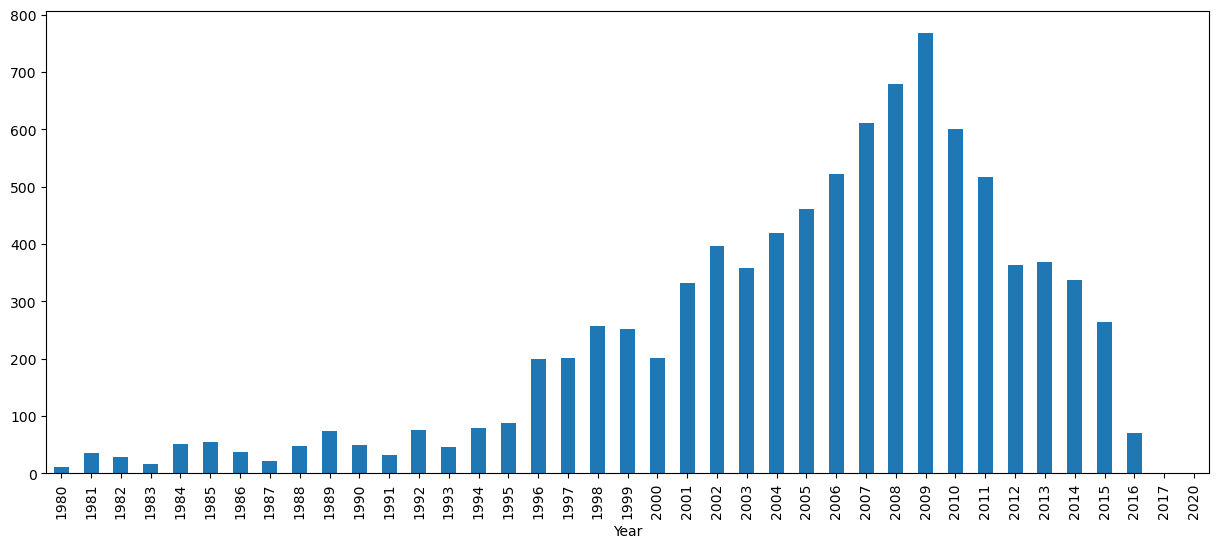

In [ ]:
sales.plot(kind='bar', figsize=(15,6))

# Yes there is clear trend over the year. From the year 1980 to 1995 the trend continued almost same but from 1996 to 2006 it kept increasing year by year. After that, from 2007 to 2020, a continuous decline has been seen in it.

# Identify top-selling games based on 'Global_Sales'.

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Ext'],
      dtype='object')

In [ ]:
df.groupby("Name")['Global_Sales'].sum().sort_values(ascending=False)

Name
Wii Sports                              82.74
Grand Theft Auto V                      55.92
Super Mario Bros.                       45.31
Tetris                                  35.84
Mario Kart Wii                          35.82
                                        ...  
Codename: Panzers Phase Two              0.01
Tengai Makyo: Dai Yon no Mokushiroku     0.01
Jewel Quest II                           0.01
Tenjin Ranman: Happy GO Lucky!!          0.01
Dark Parables: The Exiled Prince         0.01
Name: Global_Sales, Length: 11493, dtype: float64

# Wii Sports                              82.74
# Grand Theft Auto V                      55.92
# Super Mario Bros.                       45.31
# Tetris                                  35.84
# Mario Kart Wii                          35.82
# These are the top 5 salling games.

# Who are the top publishers in terms of game releases and sales?

In [ ]:
df.groupby("Publisher")['Name'].count().sort_values(ascending=False)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Playmates                          1
Playmore                           1
Plenty                             1
Pony Canyon                        1
SCS Software                       1
Name: Name, Length: 578, dtype: int64

# The Electronic Arts has released 1351 games & they are having heigest game release record ever.

In [ ]:
df.groupby("Publisher")['Global_Sales'].sum().sort_values(ascending=False)

Publisher
Nintendo                       1786.54
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Ongakukan                         0.01
Commseed                          0.01
Takuyo                            0.01
Boost On                          0.01
Naxat Soft                        0.01
Name: Global_Sales, Length: 578, dtype: float64

# Nintendo Publisher having the heigest sales record i.e. 1786.54 million.

# Are there any publishers that dominate specific genres?

In [ ]:
pdsg=df.groupby(["Publisher","Genre"])['Genre'].count().sort_values(ascending=False)
pdsg1=pdsg.nlargest(20)
pdsg1

Publisher                               Genre       
Electronic Arts                         Sports          561
Activision                              Action          310
Konami Digital Entertainment            Sports          280
Namco Bandai Games                      Action          248
THQ                                     Action          194
Ubisoft                                 Action          193
Electronic Arts                         Action          183
Warner Bros. Interactive Entertainment  Action          165
Electronic Arts                         Racing          159
Activision                              Shooter         159
Capcom                                  Action          154
Take-Two Interactive                    Sports          151
Ubisoft                                 Misc            151
Namco Bandai Games                      Role-Playing    151
Konami Digital Entertainment            Action          148
Activision                              Sports 

<Axes: xlabel='Publisher,Genre'>

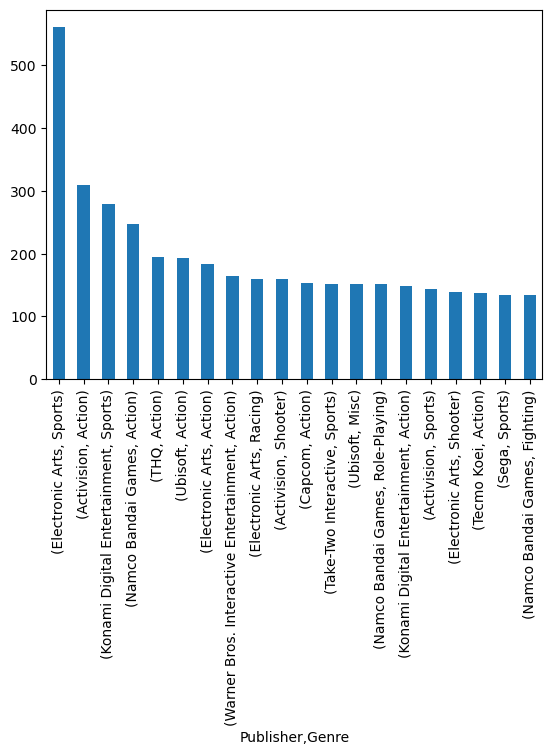

In [ ]:
pdsg1.plot(kind='bar')

#

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Ext'],
      dtype='object')

In [ ]:
# Calculate the correlation matrix

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

correlation_matrix = df[sales_columns].corr()

correlation_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767725,0.449786,0.634736,0.941047
EU_Sales,0.767725,1.000000,0.435583,0.726384,0.902835
JP_Sales,0.449786,0.435583,1.000000,0.290184,0.611814
Other_Sales,0.634736,0.726384,0.290184,1.000000,0.748330
Global_Sales,0.941047,0.902835,0.611814,0.748330,1.000000


# In our dataset, we have columns that represent video game sales in different regions: North America ('NA_Sales'), Europe ('EU_Sales'), Japan ('JP_Sales'), and other regions ('Other_Sales'). we also have a column that represents the total global sales ('Global_Sales').

# When we calculate the correlation between these columns, we are trying to see if there is a relationship between how games sell in one region and how they sell globally.

# Here's what the correlation values mean:

# Positive Correlation (close to 1): If the correlation is close to 1, it means that when video games sell well in one region (for example, North America), they tend to sell well globally. It's like saying that if a game is a big hit in North America, it's likely to be a big hit worldwide.

# No Correlation (close to 0): If the correlation is close to 0, it means there isn't much of a connection between how games sell in one region and how they sell globally. In this case, a game's success in one region doesn't tell us much about how well it will do worldwide.

# Negative Correlation (close to -1): This would be unusual in the context of regional game sales. It would mean that when games sell well in one region, they tend to sell poorly globally or vice versa. However, in the gaming industry, we usually don't expect negative correlations between regions.

# # # So, when we look at the correlation results, we are essentially checking how closely related regional sales are to global sales. If there's a strong positive correlation, it suggests that the success of a game in one region often translates into global success. If there's no strong correlation, regional sales might not be a reliable predictor of global sales.




